ARTI406 - Machine Learning

# Assignment 1: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

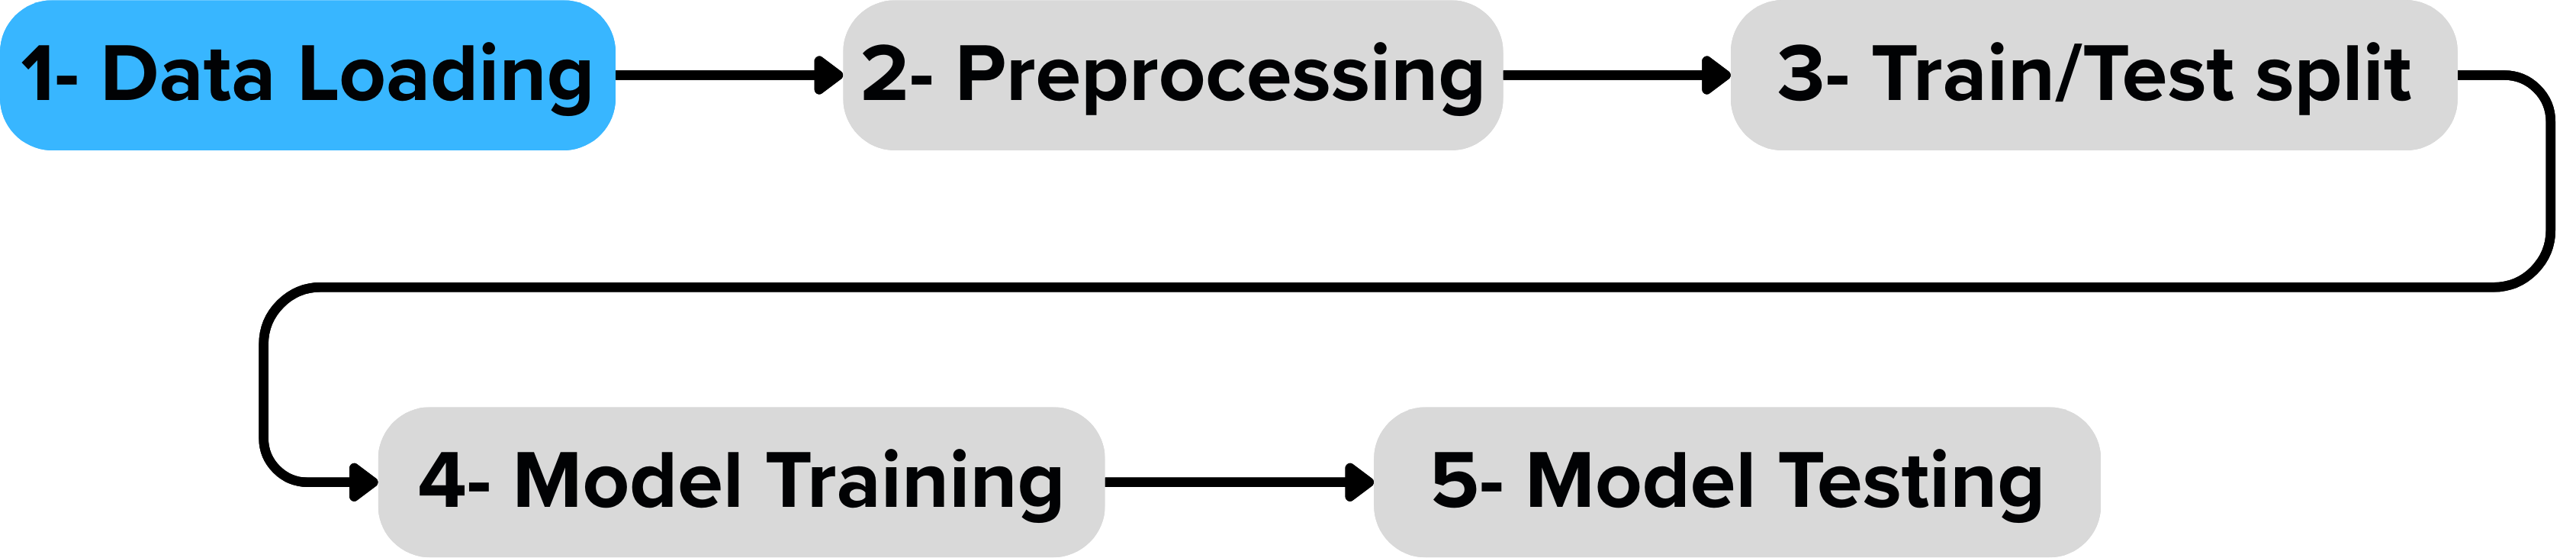

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [39]:
df = pd.read_csv("data.csv")

df.head(-1)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,22/23,Saudi Pro League,16,2/9/23,A,Al-Nassr FC,Al-Wehda FC,0:4,CF,53,0:3,Penalty,NaN
705,22/23,Saudi Pro League,16,2/9/23,A,Al-Nassr FC,Al-Wehda FC,0:4,CF,61,0:4,Right-footed shot,NaN
706,22/23,Saudi Pro League,18,2/25/23,A,Al-Nassr FC,Damac FC,0:3,CF,18,0:1,Penalty,\t
707,22/23,Saudi Pro League,18,2/25/23,A,Al-Nassr FC,Damac FC,0:3,CF,23,0:2,Left-footed shot,Sultan Al-Ghannam


The dataset contains 709 rows and 13 columns, representing Cristiano Ronaldo goals.

In [59]:
df.info


<bound method DataFrame.info of     Season               Competition      Matchday       Date Venue  \
0    02/03             Liga Portugal             6 2002-10-07     H   
1    02/03             Liga Portugal             6 2002-10-07     H   
2    02/03             Liga Portugal             8 2002-10-26     A   
3    02/03  Taca de Portugal Placard  Fourth Round 2002-11-24     H   
4    02/03  Taca de Portugal Placard   Fifth Round 2002-12-18     H   
..     ...                       ...           ...        ...   ...   
705  22/23          Saudi Pro League            16 2023-02-09     A   
706  22/23          Saudi Pro League            18 2023-02-25     A   
707  22/23          Saudi Pro League            18 2023-02-25     A   
708  22/23          Saudi Pro League            18 2023-02-25     A   
709  22/23          Saudi Pro League            21 2023-03-18     H   

            Club                 Opponent Result Playing_Position Minute  \
0    Sporting CP            Moreirense 

### Check Missing Values

In [40]:
# Check all values
print(df.isna())

     Season  Competition  Matchday   Date  Venue   Club  Opponent  Result  \
0     False        False     False  False  False  False     False   False   
1     False        False     False  False  False  False     False   False   
2     False        False     False  False  False  False     False   False   
3     False        False     False  False  False  False     False   False   
4     False        False     False  False  False  False     False   False   
..      ...          ...       ...    ...    ...    ...       ...     ...   
705   False        False     False  False  False  False     False   False   
706   False        False     False  False  False  False     False   False   
707   False        False     False  False  False  False     False   False   
708   False        False     False  False  False  False     False   False   
709   False        False     False  False  False  False     False   False   

     Playing_Position  Minute  At_score   Type  Goal_assist  
0            

In [41]:
df = df.drop_duplicates()
df.shape

(710, 13)

In [42]:
print(df.isna().sum())

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     58
Minute                0
At_score              0
Type                 15
Goal_assist         246
dtype: int64


### Check duplicate rows

In [43]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

### No. of rows and columns

In [44]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (710, 13) 

number of rows:  710
number of columns:  13


### Data type of columns

In [45]:
# viewing the data types of columns
df.dtypes

Season              object
Competition         object
Matchday            object
Date                object
Venue               object
Club                object
Opponent            object
Result              object
Playing_Position    object
Minute              object
At_score            object
Type                object
Goal_assist         object
dtype: object

In [47]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dtypes

Season                      object
Competition                 object
Matchday                    object
Date                datetime64[ns]
Venue                       object
Club                        object
Opponent                    object
Result                      object
Playing_Position            object
Minute                      object
At_score                    object
Type                        object
Goal_assist                 object
dtype: object

In [60]:
# Statistical summary
df.describe(include='object')

,Season,Competition,Matchday,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,710,710,710,710,710,710,710,652,710,710,695,464
unique,21,17,52,2,5,129,57,5,106,43,11,91
top,14/15,LaLiga,Group Stage,H,Real Madrid,Sevilla FC,3:00,LW,90,1:00,Right-footed shot,Karim Benzema
freq,61,311,75,404,450,27,49,356,17,111,253,44


### Descriptive summary Statistics

### Univariate Analysis

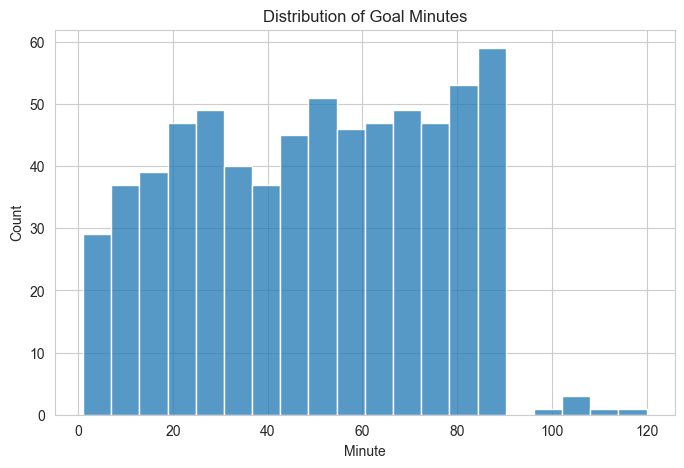

In [66]:
df['Minute'] = pd.to_numeric(df['Minute'], errors='coerce')
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Minute', bins=20)
plt.title("Distribution of Goal Minutes")
plt.show()


### Categorical Variables

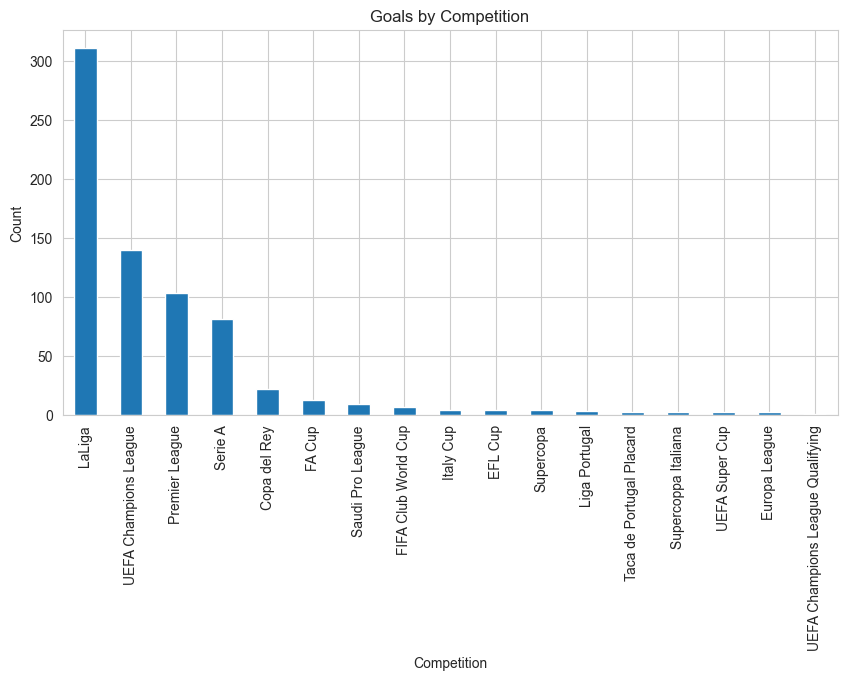

In [68]:
plt.figure(figsize=(10,5))
df['Competition'].value_counts().plot(kind='bar')
plt.title("Goals by Competition")
plt.ylabel("Count")
plt.show()


## Bivariate Analysis

### Goals by venue

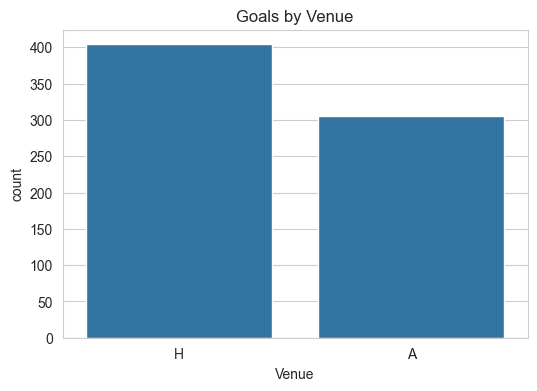

In [69]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Venue')
plt.title("Goals by Venue")
plt.show()

### Goals per Season

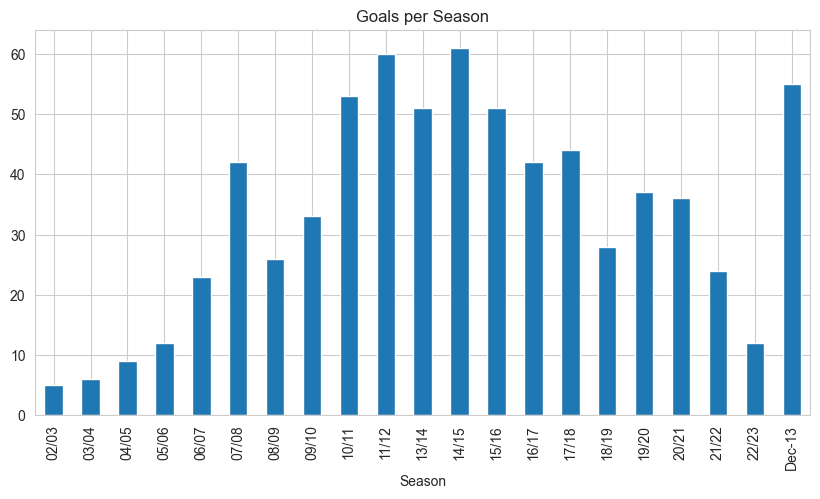

In [54]:
plt.figure(figsize=(10,5))
df['Season'].value_counts().sort_index().plot(kind='bar')
plt.title("Goals per Season")
plt.show()

### Competition vs Goal Minute Relationship

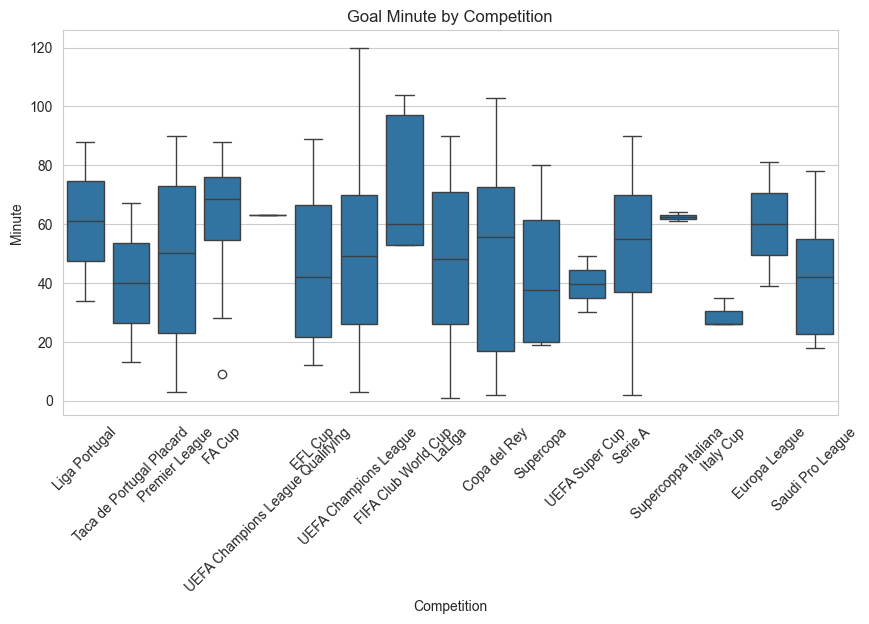

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Competition', y='Minute')
plt.xticks(rotation=45)
plt.title("Goal Minute by Competition")
plt.show()

### Match Outcome Analysis

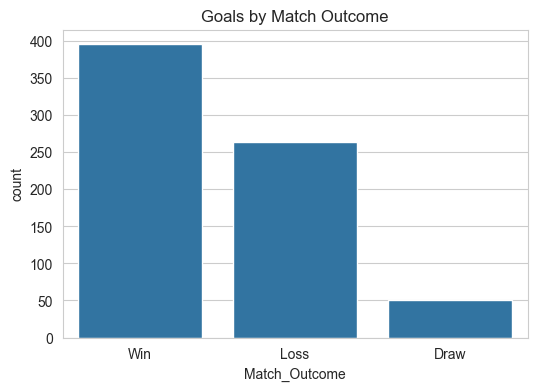

In [71]:
# Extract numbers safely
result_split = df['Result'].str.extract(r'(\d+)[-:](\d+)')

df['Goals_For'] = pd.to_numeric(result_split[0], errors='coerce')
df['Goals_Against'] = pd.to_numeric(result_split[1], errors='coerce')

df['Match_Outcome'] = df.apply(
    lambda row: 'Win' if row['Goals_For'] > row['Goals_Against']
    else ('Draw' if row['Goals_For'] == row['Goals_Against']
    else 'Loss'),
    axis=1
)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Match_Outcome')
plt.title("Goals by Match Outcome")
plt.show()


### Correlation Matrix

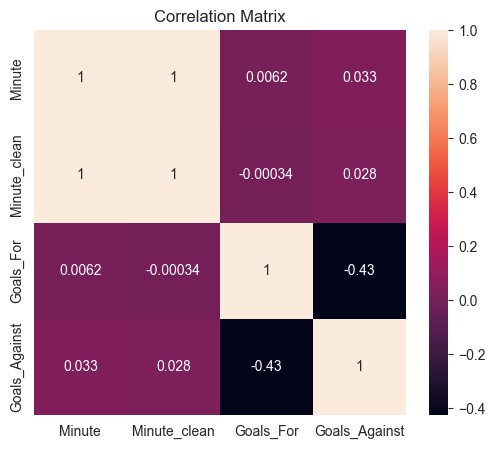

In [72]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(6,5))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Time Trend

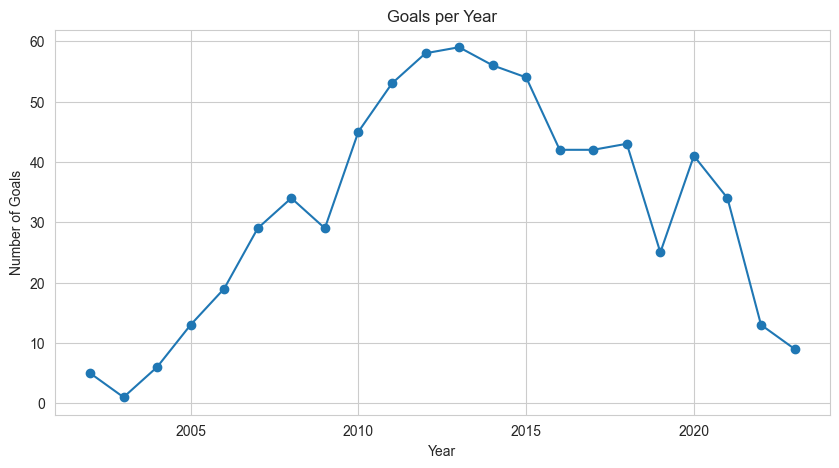

In [73]:
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(10,5))
df.groupby('Year').size().plot(marker='o')
plt.title("Goals per Year")
plt.ylabel("Number of Goals")
plt.show()


# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the following to the assignment 1 folder.
1. Dataset file 
2. Dataset Description readme file
2. Jupyter Notebook
